In [2]:
import pandas as pd
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np

from scipy.signal import find_peaks

import gc

In [3]:
start = pd.to_datetime('2019-09-04 02:00 UTC')
end = pd.to_datetime('2019-09-05 15:30 UTC')
data = pd.read_pickle('../data/accelerations/tom/BW77_filtered_fused.pickle')

<IPython.core.display.Javascript object>


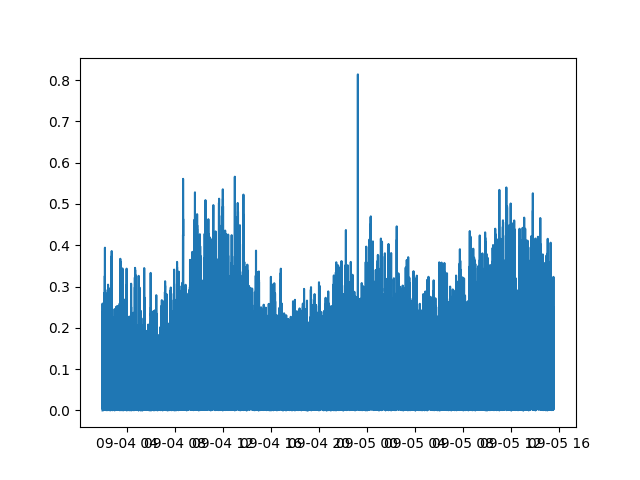

In [4]:
plt.figure()
plt.plot(data[start:end].deflection)

<IPython.core.display.Javascript object>


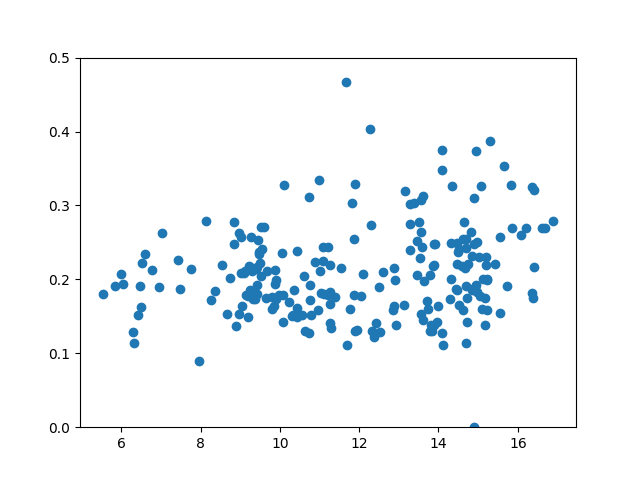

(0.0, 0.5)

In [5]:
calc_Tu = lambda x: np.sqrt(np.mean(np.power((x - np.mean(x)), 2)))/np.mean(x)

plt.figure()
plt.scatter(data[start:end].wind_speed.resample('10min').mean(),
            data[start:end].acc_x.resample('10min').std()
           )
plt.ylim([0,0.5])

<IPython.core.display.Javascript object>


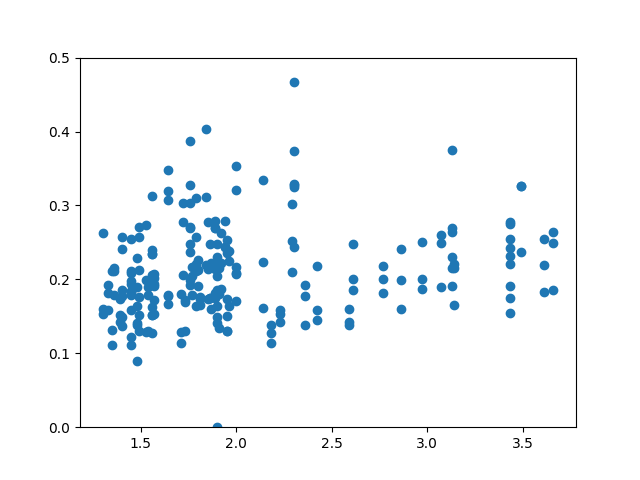

(0.0, 0.5)

In [37]:
calc_Tu = lambda x: np.sqrt(np.mean(np.power((x - np.mean(x)), 2)))/np.mean(x)

plt.figure()
plt.scatter(data[start:end].Hs.resample('10min').mean(),
            data[start:end].acc_x.resample('10min').std()
           )
plt.ylim([0,0.5])

<IPython.core.display.Javascript object>


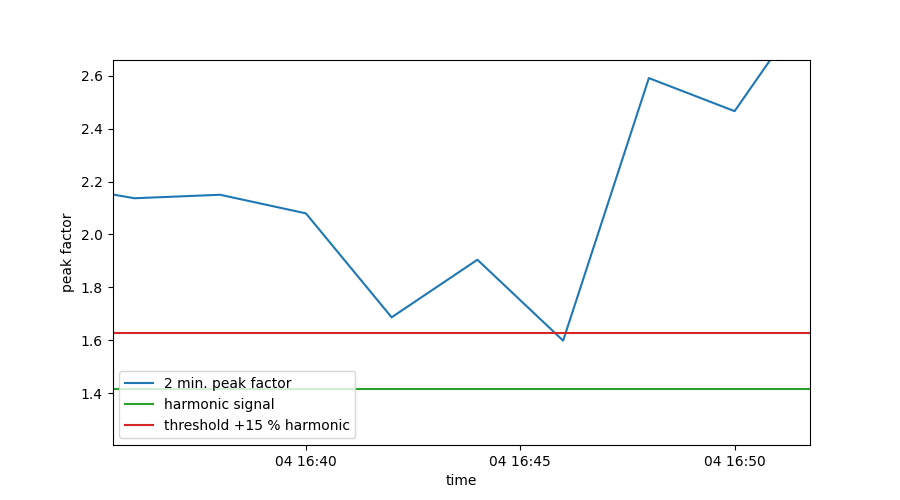

In [6]:
plt.figure(figsize=(9,5))
plt.plot(data[start:end].pos_x.resample('2min').max()/data[start:end].pos_x.resample('2min').std(), label='2 min. peak factor')
plt.axhline(y=np.sqrt(2), label='harmonic signal', color='tab:green')
plt.axhline(y=np.sqrt(2) + 0.15*np.sqrt(2), label='threshold +15 % harmonic', color='tab:red')
plt.ylim([0, 5])
plt.legend(loc='lower left')
plt.ylabel('peak factor')
plt.xlabel('time')
plt.savefig('turbine_04_peak_factor.png', dpi=150)

<IPython.core.display.Javascript object>


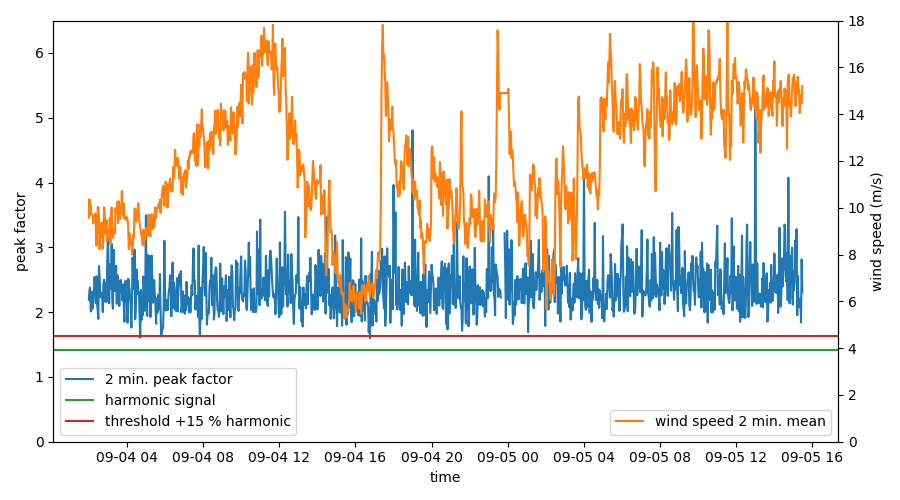

In [43]:
plt.figure(figsize=(9,5))
plt.plot(data[start:end].pos_x.resample('2min').max()/data[start:end].pos_x.resample('2min').std(), label='2 min. peak factor')
plt.axhline(y=np.sqrt(2), label='harmonic signal', color='tab:green')
plt.axhline(y=np.sqrt(2) + 0.15*np.sqrt(2), label='threshold +15 % harmonic', color='tab:red')
plt.ylim([0, 6.5])
plt.legend(loc='lower left')
plt.ylabel('peak factor')
plt.xlabel('time')
ax2 = plt.gca().twinx()
ax2.plot(data[start:end].wind_speed.resample('2min').mean(), label='wind speed 2 min. mean', color='tab:orange')
ax2.legend(loc='lower right')
ax2.set_ylabel('wind speed (m/s)')
ax2.set_ylim([0, 18])
plt.tight_layout()
plt.savefig('turbine_04_peak_factor_wind_speed.png', dpi=150)